In [3]:
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [8]:
# !pip install plotnine -> 시각화 라이브러리 : R에서 시각화하는 방법과 유사
# !pip install missingno -> 누락값(결측치)을 시각화하는 라이브러리
from plotnine import *
import missingno as msno

In [9]:
# 공공데이터포털 https://www.data.go.kr/dataset/3035522/fileData.do
# 2015년 10월부터 2018년 7월까지 주택 분양 보증을 받아 분양한 전체 민간 아파트 신규 분양가격 동향

In [11]:
%pwd
# 현재 화면의 소스 프로그램 위치(경로) 확인

'D:\\PythonAI_sep\\workspace'

In [14]:
%ls
# 현재 화면의 소스 프로그램의 위치에 저장된 파일 목록 확인
# 현재 폴더 아래에 위치한 폴더의 파일 목록은 '%ls 폴더이름' 으로 실행한다.

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 44CA-26ED

 D:\PythonAI_sep\workspace 디렉터리

2021-10-12  오후 07:23    <DIR>          .
2021-10-12  오후 07:23    <DIR>          ..
2021-10-12  오후 07:04    <DIR>          .ipynb_checkpoints
2021-09-14  오후 07:13             5,249 00_numpy_0.ipynb
2021-09-14  오후 09:37            93,599 01_numpy_1.ipynb
2021-09-16  오후 09:37            29,944 02_numpy_2.ipynb
2021-09-23  오후 07:24            55,933 03_numpy_3.ipynb
2021-09-23  오후 08:54            56,911 04_pandas_1.ipynb
2021-09-28  오후 08:32            76,689 05_pandas_2.ipynb
2021-09-30  오후 08:15           122,068 06_pandas_3.ipynb
2021-09-30  오후 09:43            83,993 07_pandas_4.ipynb
2021-10-01  오후 08:23            75,106 08_pandas_5.ipynb
2021-10-01  오후 09:15            39,873 09_pandas_6.ipynb
2021-10-05  오후 08:00            54,755 10_pandas_7.ipynb
2021-10-05  오후 09:20            49,846 11_matplotlib_hanguel.ipynb
2021-10-05  오후 09:42            72,773 12_visualization_anscombe.ipynb
2021-10-07  오후 09:4

In [16]:
# read_csv() 함수로 읽어들이는 csv 파일이 한글 인코딩 문제로 에러가 발생되면 
# pre_sale = pd.read_csv('./data/전국_평균_분양가격_2018.6월_.csv', encoding='euc-kr')
pre_sale = pd.read_csv('./data/preSale_2018_6.csv')
pre_sale

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN


In [19]:
# dtypes 속성이나 info() 함수를 이용해서 데이터프레임을 구성하는 데이터 타입을 확인하고 변경한다.
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [20]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2805 non-null   object
 1   규모구분     2805 non-null   object
 2   연도       2805 non-null   int64 
 3   월        2805 non-null   int64 
 4   분양가격(㎡)  2674 non-null   object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [22]:
# 연도와 월은 구분에 사용되는 데이터이므로 문자열 형태로 변환한다.
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2805 non-null   object
 1   규모구분     2805 non-null   object
 2   연도       2805 non-null   object
 3   월        2805 non-null   object
 4   분양가격(㎡)  2674 non-null   object
dtypes: object(5)
memory usage: 109.7+ KB


In [29]:
# 분양가격 데이터 타입을 숫자로 변경하고 평당 분양 가격을 계산한다

# pre_sale['분양가격(㎡)'] = pre_sale['분양가격(㎡)'].astype(float)
# to_numeric() 함수의 error 속성을 coerce로 지정하면 오류가 발생된 데이터를 누락값으로 변경한다.

pre_sale['분양가격(㎡)'] = pd.to_numeric(pre_sale['분양가격(㎡)'], errors='coerce')
pre_sale['평당분양가격'] = pre_sale['분양가격(㎡)'] * 3.3
pre_sale

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
2800,제주,전체,2018,6,3925.0,12952.5
2801,제주,전용면적 60㎡이하,2018,6,5462.0,18024.6
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639.0,12008.7
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN,NaN


In [33]:
# isnull() 함수와 sum() 함수를 사용해서 누락값 확인
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    223
평당분양가격     223
dtype: int64

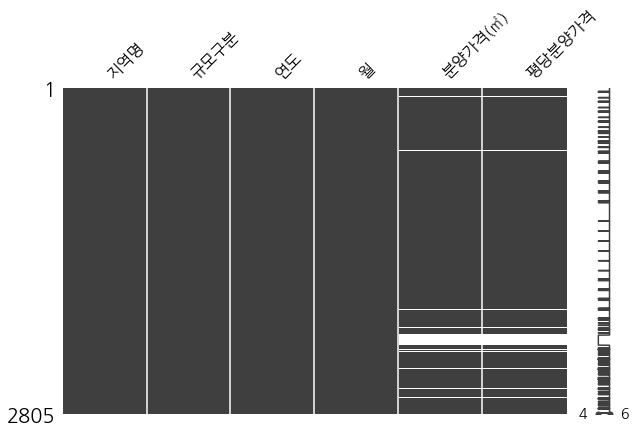

In [37]:
# missingno 라이브러리로 그래프를 그려서 누락값 확인하기 => 흰색으로 보이는 부분이 누락값을 의미한다.
msno.matrix(pre_sale, figsize = (10, 6))
plt.show()

In [39]:
# 2017년 데이터만 추출한다.
# pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
1275,서울,전체,2017,1,6450.0,21285.0
1276,서울,전용면적 60㎡이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60㎡초과 85㎡이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85㎡초과 102㎡이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102㎡초과,2017,1,6771.0,22344.3
...,...,...,...,...,...,...
2290,제주,전체,2017,12,3578.0,11807.4
2291,제주,전용면적 60㎡이하,2017,12,5380.0,17754.0
2292,제주,전용면적 60㎡초과 85㎡이하,2017,12,3467.0,11441.1
2293,제주,전용면적 85㎡초과 102㎡이하,2017,12,NaN,NaN


In [41]:
pre_sale['지역명'].value_counts() # 지역별로 데이터가 동일하게 저장되어 있다.


전남    165
제주    165
울산    165
전북    165
충남    165
경남    165
경기    165
충북    165
세종    165
대구    165
광주    165
서울    165
대전    165
인천    165
강원    165
부산    165
경북    165
Name: 지역명, dtype: int64

In [43]:
pre_sale['규모구분'].value_counts() # 규모구분별로 데이터가 동일하게 저장되어 있다.


전용면적 102㎡초과          561
전용면적 60㎡초과 85㎡이하     561
전용면적 60㎡이하           561
전체                   561
전용면적 85㎡초과 102㎡이하    561
Name: 규모구분, dtype: int64

전국 평균 분양 가격

In [50]:
# 데이터프레임에 저장된 실수 데이터의 출력 서식을 지정할 수 있다.
# '{:,.1f}' : 천 단위마다 , 를 출력하고 . 뒤의 숫자만큼 소수점 아래로 표현한다.
pd.options.display.float_format = '{:,.1f}'.format

In [51]:
# groupby() 함수와 피벗 테이블(T 옵션) 활용하기
# describe() 함수로 데이터프레임에 저장된 숫자 데이터의 요약 통계량을 확인할 수 있다.
pre_sale.groupby(pre_sale['연도']).describe()


분양가격(㎡)                                                         평당분양가격  \
       count    mean     std     min     25%     50%     75%     max  count   
연도                                                                            
2015   243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5 7,092.0  243.0   
2016   984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5 8,096.0  984.0   
2017   899.0 3,139.5 1,107.6 1,976.0 2,365.0 2,849.0 3,456.0 7,887.0  899.0   
2018   456.0 3,299.4 1,199.3 2,076.0 2,470.5 2,912.5 3,647.2 8,098.0  456.0   

                                                                 
         mean     std     min     25%     50%      75%      max  
연도                                                               
2015  9,202.7 3,223.6 6,164.4 7,342.5 8,302.8  9,984.1 23,403.6  
2016  9,683.0 3,535.8 6,270.0 7,530.6 8,817.6 10,390.0 26,716.8  
2017 10,360.5 3,655.0 6,520.8 7,804.5 9,401.7 11,404.8 26,027.1  
2018 10,888.1 3,957.7 6,850.8 8,152.6 9,611.2 12,035.9 26,723.4

In [47]:
# describe() 함수의 실행 결과에 'T' 속성을 지정하면 요약 통계량이 전치되어 수직 방향으로 출력된다.
pre_sale.groupby(pre_sale['연도']).describe().T


연도                     2015          2016          2017          2018
분양가격(㎡) count    243.000000    984.000000    899.000000    456.000000
        mean    2788.707819   2934.250000   3139.541713   3299.421053
        std      976.861182   1071.441561   1107.584870   1199.297534
        min     1868.000000   1900.000000   1976.000000   2076.000000
        25%     2225.000000   2282.000000   2365.000000   2470.500000
        50%     2516.000000   2672.000000   2849.000000   2912.500000
        75%     3025.500000   3148.500000   3456.000000   3647.250000
        max     7092.000000   8096.000000   7887.000000   8098.000000
평당분양가격  count    243.000000    984.000000    899.000000    456.000000
        mean    9202.735802   9683.025000  10360.487653  10888.089474
        std     3223.641902   3535.757150   3655.030071   3957.681861
        min     6164.400000   6270.000000   6520.800000   6850.800000
        25%     7342.500000   7530.600000   7804.500000   8152.650000
        50%     8302.800000   8817.600000   9401.700000   9611.250000
        75%     9984.150000  10390.050000  11404.800000  12035.925000
        max    23403.600000  26716.800000  26027.100000  26723.400000

전국 규모별 평균 분양 가격

In [56]:
# pivot_table(values, index, columns[, aggfunc, fill_value])
# values: 통계 함수를 적용할 데이터프레임의 열을 지정한다.
# index: 피벗 테이블의 그룹화의 첫 번째 기준으로 사용될 데이터프레임의 열을 지정한다. => 행
# columns: 피벗 테이블의 그룹화의 두 번째 기준으로 사용될 데이터프레임의 열을 지정한다. => 열
# aggfunc: index와 columns로 그룹화된 values에 적용할 함수를 지정한다. => 기본값은 mean 함수이다.
# fill_value: NaN을 대체할 값을 지정한다. => 주로 0 사용
pre_sale.pivot_table('평당분양가격', '규모구분', '연도', max)

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"21,618.3","23,895.3","22,931.7","23,931.6"
전용면적 60㎡이하,"20,859.3","22,152.9","23,116.5","24,149.4"
전용면적 60㎡초과 85㎡이하,"19,687.8","21,572.1","21,522.6","22,238.7"
전용면적 85㎡초과 102㎡이하,"23,403.6","26,716.8","26,027.1","26,723.4"
전체,"19,965.0","21,261.9","22,129.8","22,832.7"


전국 지역별 평균 분양 가격

In [58]:
# 규모 구분이 전체로 되어 있는 금액으로만 연도별 변동 금액을 살펴보자
# 규모 구분이 전체인 데이터만 추출한다.
region_year_all = pre_sale[pre_sale['규모구분'] == '전체']
region_year_all

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,"5,841.0","19,275.3"
5,인천,전체,2015,10,"3,163.0","10,437.9"
10,경기,전체,2015,10,"3,138.0","10,355.4"
15,부산,전체,2015,10,"3,112.0","10,269.6"
20,대구,전체,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
2780,전북,전체,2018,6,"2,326.0","7,675.8"
2785,전남,전체,2018,6,"2,356.0","7,774.8"
2790,경북,전체,2018,6,"2,631.0","8,682.3"
2795,경남,전체,2018,6,"2,695.0","8,893.5"


In [62]:
# 피벗 테이블 결과는 2번째 인수(index)가 피벗 테이블의 index로 사용되므로 피벗 테이블의 인덱스를 다시 지정하려면 reset_index() 지정
region_year = region_year_all.pivot_table('평당분양가격','지역명','연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,159.9","7,011.1","7,126.8","7,642.8"
1,경기,"10,377.4","11,220.0","11,850.0","12,854.0"
2,경남,"7,585.6","7,847.9","8,119.8","8,894.0"
3,경북,"7,170.9","7,360.7","7,794.9","8,261.6"
4,광주,"8,052.0","8,898.7","9,463.5","9,629.9"
5,대구,"9,232.3","10,310.0","11,455.8","11,651.7"
6,대전,"8,098.2","8,501.6","9,044.7","9,588.7"
7,부산,"10,307.0","10,429.9","11,577.9","12,709.9"
8,서울,"19,725.2","20,663.5","21,375.9","22,299.2"
9,세종,"8,750.5","8,860.5","9,135.3","10,381.8"


전국 지역별 평균 분양가격 변동 금액

In [64]:
region_year['변동액'] = region_year['2018'] - region_year['2015']
region_year

연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,159.9","7,011.1","7,126.8","7,642.8",482.9
1,경기,"10,377.4","11,220.0","11,850.0","12,854.0","2,476.6"
2,경남,"7,585.6","7,847.9","8,119.8","8,894.0","1,308.4"
3,경북,"7,170.9","7,360.7","7,794.9","8,261.6","1,090.7"
4,광주,"8,052.0","8,898.7","9,463.5","9,629.9","1,577.9"
5,대구,"9,232.3","10,310.0","11,455.8","11,651.7","2,419.4"
6,대전,"8,098.2","8,501.6","9,044.7","9,588.7","1,490.5"
7,부산,"10,307.0","10,429.9","11,577.9","12,709.9","2,403.0"
8,서울,"19,725.2","20,663.5","21,375.9","22,299.2","2,574.0"
9,세종,"8,750.5","8,860.5","9,135.3","10,381.8","1,631.3"


In [68]:
# region_year['변동액'].max()
max_delta_price = np.max(region_year['변동액'])
print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주로 상승액은 평당 {:,.1f} 이다.'
      .format(max_delta_price))


2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주로 상승액은 평당 5,335.6 이다.


plotnine 패키지를 이용한 시각화

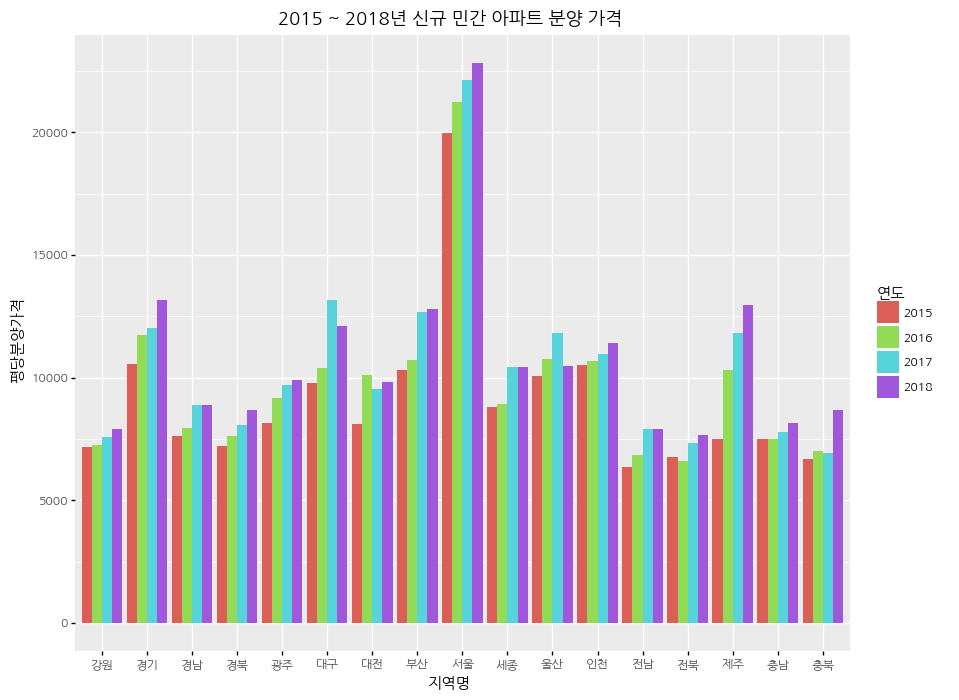

<ggplot: (172074992609)>

In [80]:
# 전국 지역별 평균 분양 가격
# ggplot(데이터프레임, aes(x='x축 데이터', y='y축 데이터', fill='범례'))
# geom_bar(stat='identity'): 세로 막대 그래프/ position 옵션을 지정하지 않으면 누적 막대그래프, 지정하면 범례별 막대 그래프가 생성된다.
ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) \
    + geom_bar(stat='identity', position='dodge') \
    + ggtitle('2015 ~ 2018년 신규 민간 아파트 분양 가격') \
    + theme(text=element_text(family = 'NanumGothic'), figure_size = (10,8))

In [84]:
# 규모별  지역별 평당 분양가격 합계
pre_sale.pivot_table('평당분양가격','지역명', '규모구분', sum)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
강원,"251,862.6","229,911.0","230,914.2","182,688.0","229,864.8"
경기,"435,246.9","393,587.7","372,794.4","384,918.6","373,246.5"
경남,"295,092.6","266,250.6","258,815.7","314,694.6","259,614.3"
경북,"274,744.8","244,675.2","245,028.3","219,407.1","245,153.7"
광주,"269,910.3","229,336.8","293,092.8","176,625.9","292,818.9"
대구,"393,699.9","360,112.5","348,450.3","227,924.4","347,341.5"
대전,"171,388.8","282,097.2","280,919.1","234,973.2","283,338.0"
부산,"402,675.9","341,002.2","356,330.7","351,063.9","359,696.7"
서울,"705,104.4","703,220.1","662,966.7","758,844.9","676,067.7"


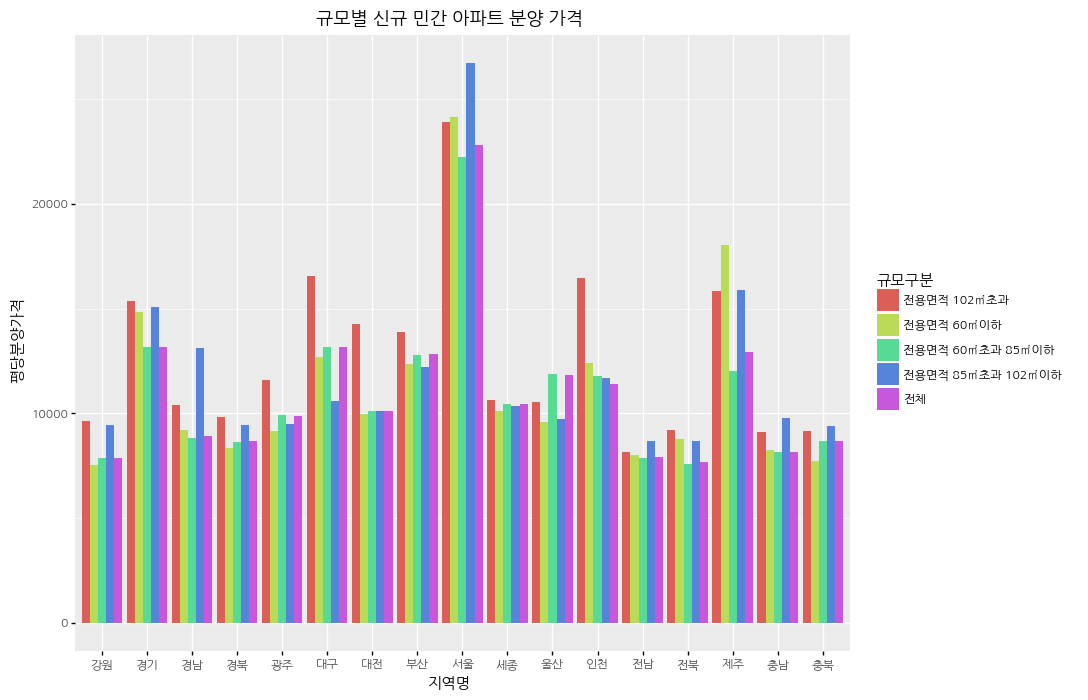

<ggplot: (-9223371864779233301)>

In [87]:
# 규모별  지역별 평당 분양가격 합계 시각화
ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분')) \
    + geom_bar(stat='identity', position='dodge') \
    + ggtitle('규모별 신규 민간 아파트 분양 가격') \
    + theme(text=element_text(family = 'NanumGothic'), figure_size = (10,8))

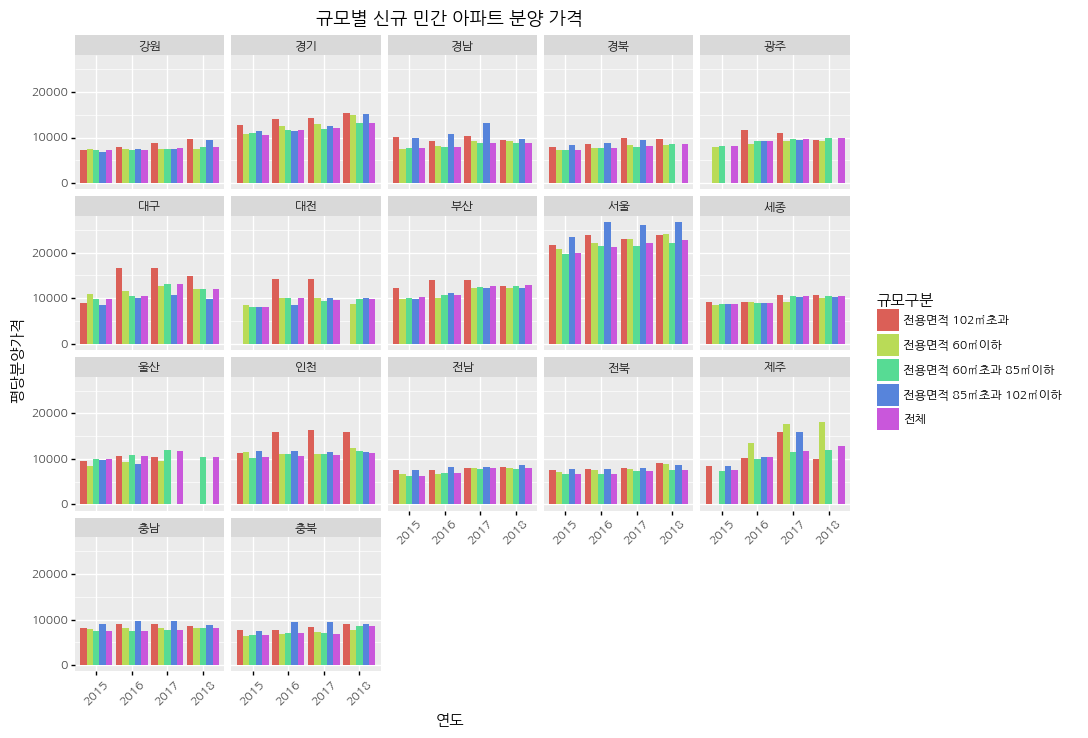

<ggplot: (172072334200)>

In [91]:
# 지역별로 차트보기
ggplot(pre_sale, aes(x='연도', y='평당분양가격', fill='규모구분')) \
    + geom_bar(stat='identity', position='dodge') \
    + facet_wrap('지역명') \
    + ggtitle('규모별 신규 민간 아파트 분양 가격') \
    + theme(text=element_text(family = 'NanumGothic'), figure_size = (10,8), axis_text_x=element_text(rotation=45))

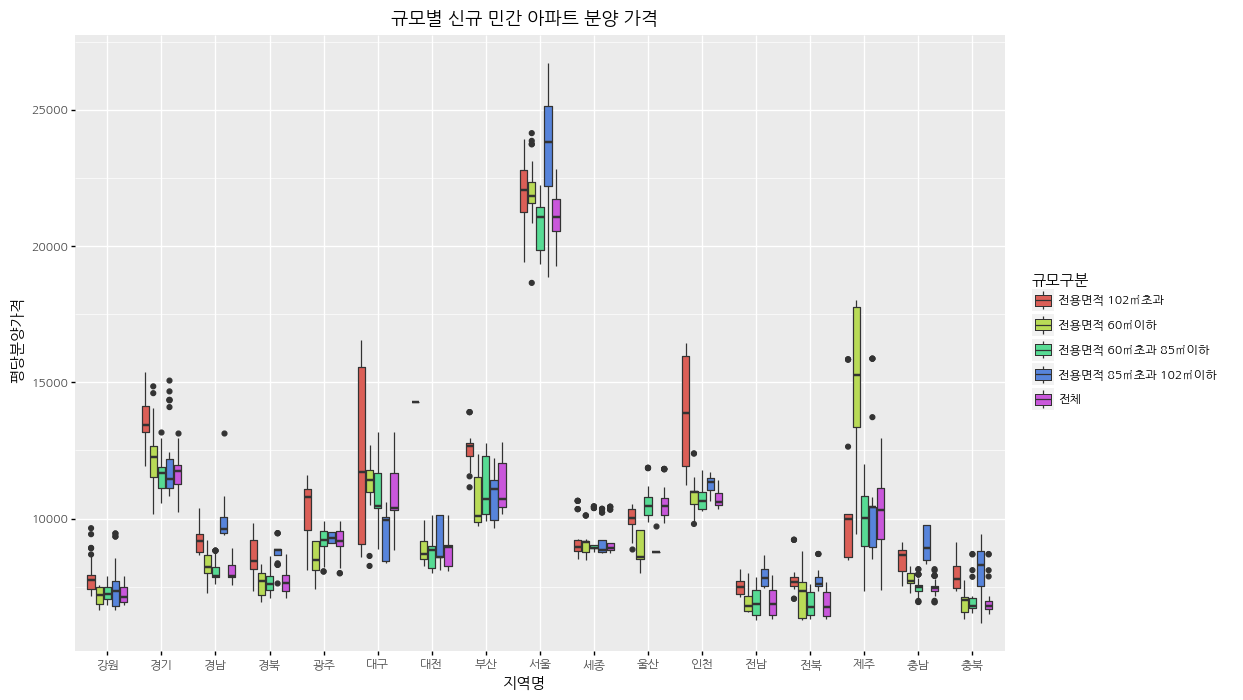

<ggplot: (-9223371864780457882)>

In [96]:
# boxplot 그려보기
ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분')) \
    + geom_boxplot() \
    + ggtitle('규모별 신규 민간 아파트 분양 가격') \
    + theme(text=element_text(family = 'NanumGothic'), figure_size = (12, 8))

In [99]:
# 사업 규모가 가장 큰 서울
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']
pre_sale_seoul

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60㎡이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102㎡초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
2720,서울,전체,2018,6,"6,694.0","22,090.2"
2721,서울,전용면적 60㎡이하,2018,6,"7,232.0","23,865.6"
2722,서울,전용면적 60㎡초과 85㎡이하,2018,6,"6,739.0","22,238.7"
2723,서울,전용면적 85㎡초과 102㎡이하,2018,6,"7,591.0","25,050.3"


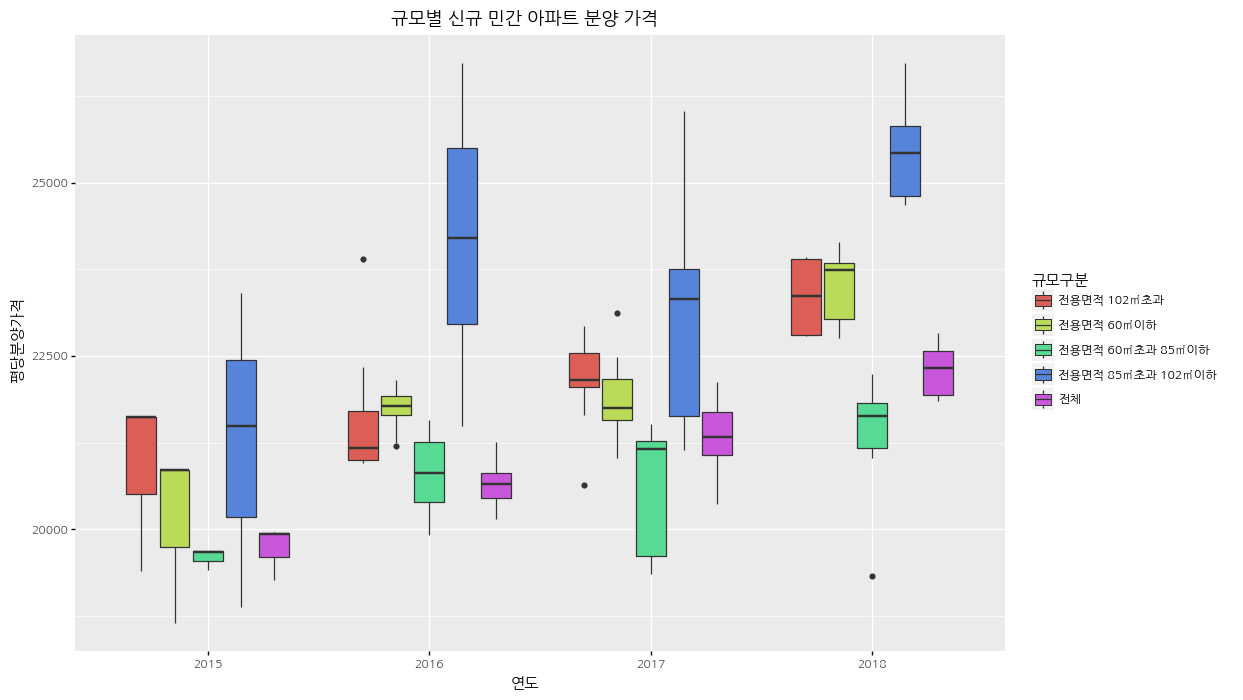

<ggplot: (-9223371864781828457)>

In [104]:
ggplot(pre_sale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분')) \
    + geom_boxplot() \
    + ggtitle('규모별 신규 민간 아파트 분양 가격') \
    + theme(text=element_text(family = 'NanumGothic'), figure_size = (12, 8))

In [107]:
# 분양가 차이가 가장 큰 제주
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']
pre_sale_jeju

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
80,제주,전체,2015,10,"2,232.0","7,365.6"
81,제주,전용면적 60㎡이하,2015,10,nan,nan
82,제주,전용면적 60㎡초과 85㎡이하,2015,10,"2,225.0","7,342.5"
83,제주,전용면적 85㎡초과 102㎡이하,2015,10,"2,583.0","8,523.9"
84,제주,전용면적 102㎡초과,2015,10,"2,574.0","8,494.2"
...,...,...,...,...,...,...
2800,제주,전체,2018,6,"3,925.0","12,952.5"
2801,제주,전용면적 60㎡이하,2018,6,"5,462.0","18,024.6"
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,"3,639.0","12,008.7"
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,nan,nan


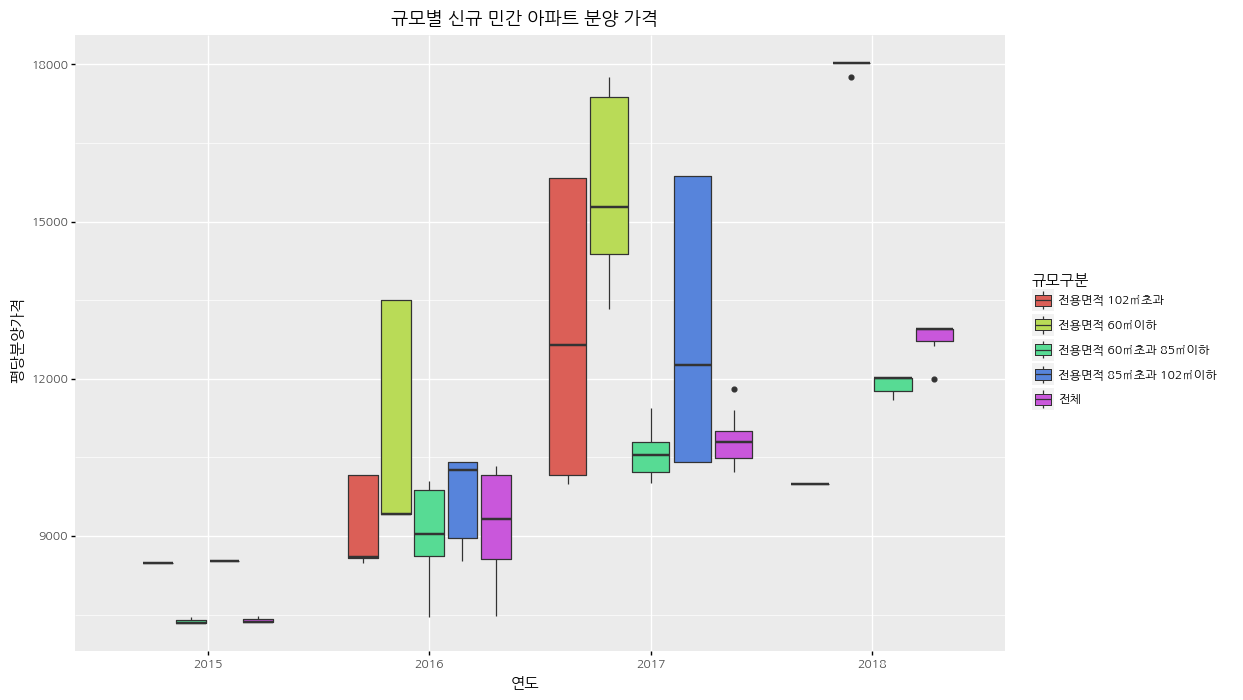

<ggplot: (-9223371864779817440)>

In [109]:
ggplot(pre_sale_jeju, aes(x='연도', y='평당분양가격', fill='규모구분')) \
    + geom_boxplot() \
    + ggtitle('규모별 신규 민간 아파트 분양 가격') \
    + theme(text=element_text(family = 'NanumGothic'), figure_size = (12, 8))

In [111]:
pre_sale_ulsan = pre_sale[pre_sale['지역명'] == '울산']
pre_sale_ulsan

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
35,울산,전체,2015,10,"3,053.0","10,074.9"
36,울산,전용면적 60㎡이하,2015,10,"2,422.0","7,992.6"
37,울산,전용면적 60㎡초과 85㎡이하,2015,10,"3,040.0","10,032.0"
38,울산,전용면적 85㎡초과 102㎡이하,2015,10,"2,951.0","9,738.3"
39,울산,전용면적 102㎡초과,2015,10,"2,690.0","8,877.0"
...,...,...,...,...,...,...
2755,울산,전체,2018,6,"3,125.0","10,312.5"
2756,울산,전용면적 60㎡이하,2018,6,nan,nan
2757,울산,전용면적 60㎡초과 85㎡이하,2018,6,"3,125.0","10,312.5"
2758,울산,전용면적 85㎡초과 102㎡이하,2018,6,nan,nan


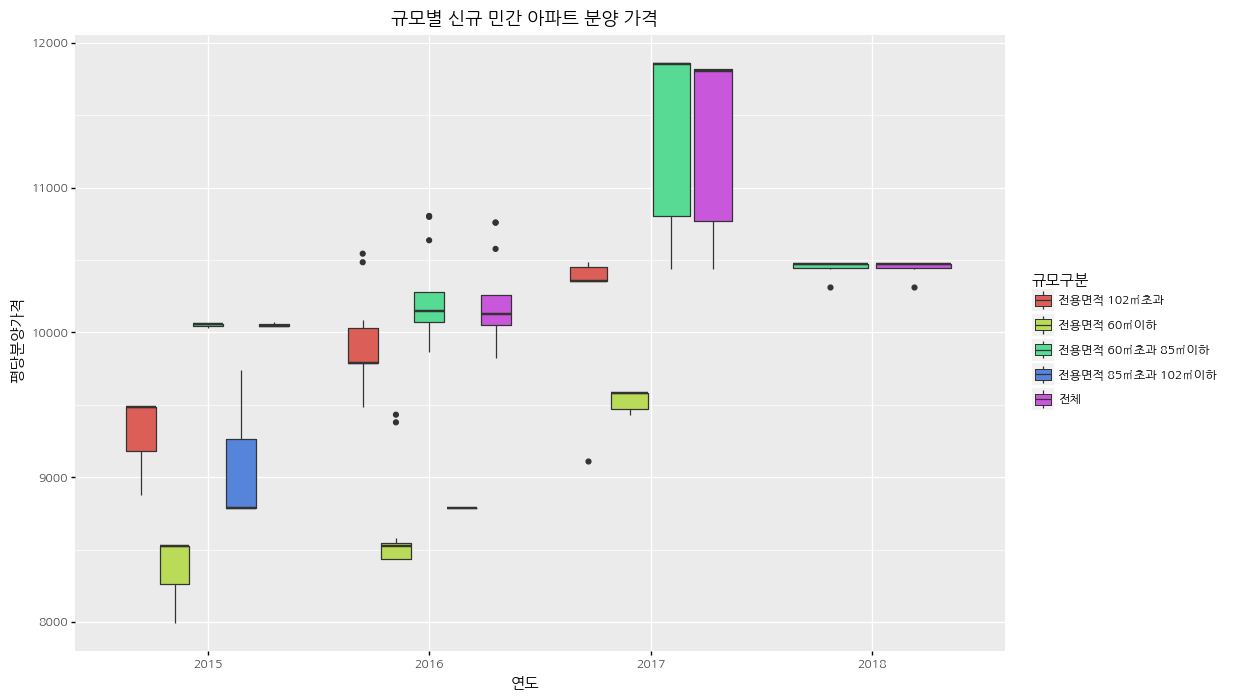

<ggplot: (-9223371864779242699)>

In [113]:
ggplot(pre_sale_ulsan, aes(x='연도', y='평당분양가격', fill='규모구분')) \
    + geom_boxplot() \
    + ggtitle('규모별 신규 민간 아파트 분양 가격') \
    + theme(text=element_text(family = 'NanumGothic'), figure_size = (12, 8))